# Predicting Coupling Types using Scalar Coupling Constants

In [46]:
#the basics 

import os
import glob
from datetime import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime
import matplotlib.dates as mdates
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline

In [65]:
#import machine learning models

from sklearn import svm
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

In [2]:
file = glob.glob(os.path.join(os.getcwd(),'data') + '/*.csv') #filepath to data
file

['/Users/patrickcullinane/Documents/Code/ml_meetup/data/train.csv']

In [3]:
train = pd.read_csv(file[0]); train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [75]:
first_10k = train[:10000]

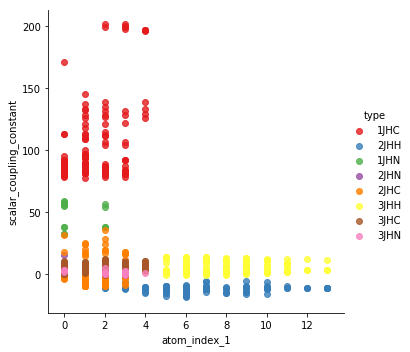

In [77]:
sns.lmplot('atom_index_1','scalar_coupling_constant',data=first_1k,hue='type',palette='Set1', fit_reg=False)
plt.show()

In [52]:
label_encoder = preprocessing.LabelEncoder()
#df['label'] = le.fit_transform(df.label.values)
type_coupling = label_encoder.fit_transform(first_10k.type.values)
type_coupling

array([0, 3, 3, ..., 3, 5, 4])

In [53]:
#inputs for the model
atom_scalar = first_10k[['atom_index_1','scalar_coupling_constant']].as_matrix()

/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [55]:
#support vector machine
clf = svm.SVC(kernel='linear')
clf.fit(atom_scalar,type_coupling)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

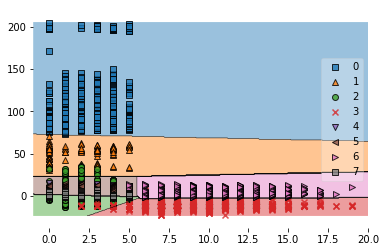

In [70]:
#support vector machine
X = first_10k[['atom_index_1','scalar_coupling_constant']]

plot_decision_regions(X=X.values, y=type_coupling, clf=clf, legend=7)

plt.show()

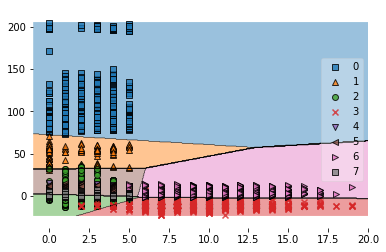

In [71]:
#logistic regression
lr_clf = LogisticRegression(random_state=1, solver='newton-cg', multi_class='multinomial')
lr_clf.fit(atom_scalar,type_coupling)

plot_decision_regions(X=X.values, y=type_coupling, clf=lr_clf, legend=7)
plt.show()

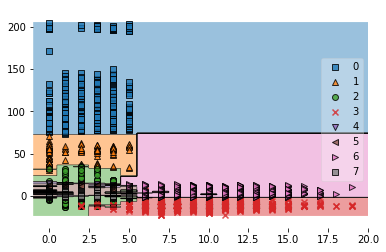

In [73]:
#random forest
rf_clf = RandomForestClassifier(random_state=1, n_estimators=100)
rf_clf.fit(atom_scalar,type_coupling)

plot_decision_regions(X=X.values, y=type_coupling, clf=rf_clf, legend=7)
plt.show()

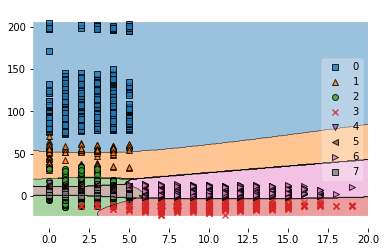

In [74]:
#naive bayes
nb_clf = GaussianNB()
nb_clf.fit(atom_scalar,type_coupling)

plot_decision_regions(X=X.values, y=type_coupling, clf=nb_clf, legend=7)
plt.show()